In [1]:
from qsvm_datasets import *

from qiskit import Aer
from qiskit_aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit_aqua.input import SVMInput
from qiskit_aqua import run_algorithm, QuantumInstance
from qiskit_aqua.algorithms import QSVMKernel
from qiskit_aqua.components.feature_maps import SecondOrderExpansion

# setup aqua logging
import logging
from qiskit_aqua import set_aqua_logging
# set_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

In [2]:
from qiskit import IBMQ
IBMQ.save_account('6353fed18aab0e207a39838ab247e08636da13929fd60658eec1447c82e69fc87e2d98c4dc2acce5af0c08c80a4bb34bf55e1ecab5b43c80b97514101b507e14')

In [3]:
from qiskit import IBMQ
IBMQ.load_accounts()

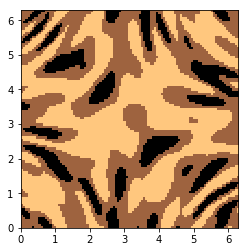

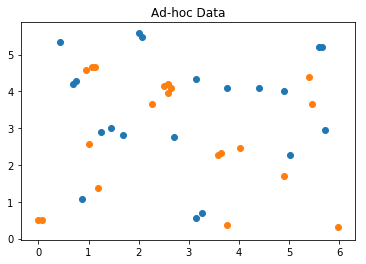

{'A': 0, 'B': 1}


In [4]:
feature_dim=2 # we support feature_dim 2 or 3
sample_Total, training_input, test_input, class_labels = ad_hoc_data(training_size=20, 
                                                                     test_size=10, 
                                                                     n=feature_dim, 
                                                                     gap=0.3, 
                                                                     PLOT_DATA=True)
extra_test_data = sample_ad_hoc_data(sample_Total, 10, n=feature_dim)
datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
print(class_to_label)

In [5]:
seed = 10598

feature_map = SecondOrderExpansion(num_qubits=feature_dim, depth=2, entanglement='linear')
qsvm = QSVMKernel(feature_map, training_input, test_input, datapoints[0])

backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed=seed, seed_mapper=seed)

result = qsvm.run(quantum_instance)

"""declarative approach
params = {
    'problem': {'name': 'svm_classification', 'random_seed': 10598},
    'algorithm': {
        'name': 'QSVM.Kernel'
    },
    'backend': {'name': 'qasm_simulator', 'shots': 1024},
    'feature_map': {'name': 'SecondOrderExpansion', 'depth': 2, 'entanglement': 'linear'}
}
algo_input = SVMInput(training_input, test_input, datapoints[0])
result = run_algorithm(params, algo_input)
"""

print("testing success ratio: {}".format(result['testing_accuracy']))
print("preduction of datapoints:")
print("ground truth: {}".format(map_label_to_class_name(datapoints[1], qsvm.label_to_class)))
print("prediction:   {}".format(result['predicted_classes']))

testing success ratio: 1.0
preduction of datapoints:
ground truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
prediction:   ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


kernel matrix during the training:


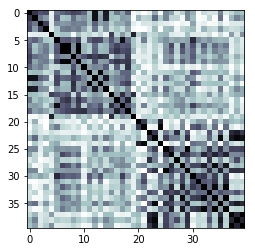

In [6]:
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()

### The breast cancer dataset
Now we run our algorithm with the real-world dataset: the breast cancer dataset, we use the first two principal components as features.

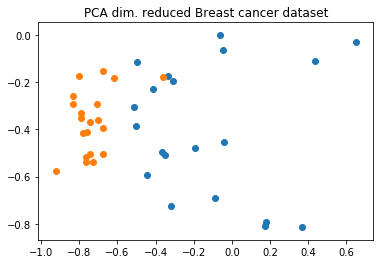

In [7]:
sample_Total, training_input, test_input, class_labels = Breast_cancer(training_size=20,
                                                                       test_size=10,
                                                                       n=2,
                                                                       PLOT_DATA=True)

In [8]:
seed = 10598

feature_map = SecondOrderExpansion(num_qubits=feature_dim, depth=2, entanglement='linear')
qsvm = QSVMKernel(feature_map, training_input, test_input)

backend = Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed=seed, seed_mapper=seed)

result = qsvm.run(quantum_instance)

"""declarative approach, re-use the params above
algo_input = SVMInput(training_input, test_input)
result = run_algorithm(params, algo_input)
"""
print("testing success ratio: ", result['testing_accuracy'])

testing success ratio:  0.9


kernel matrix during the training:


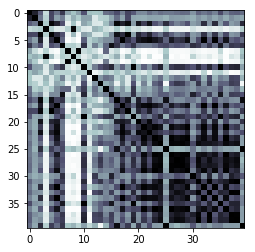

In [9]:
print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r')
plt.show()